# **`Project Title: MalariaNet - Deep Learning for Malaria Image Classification with TensorFlow`**

#### UMBC Data Science Master Degree Capstone - DATA606

**Guided by:**

Dr. Chaojie (Jay) Wang



### **Data:**
### **Data Source:** [Kaggle - Malaria Cell Images Dataset](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/data)
The dataset "Cell Images for Detecting Malaria" contains a collection of images representing blood smears of individuals infected with malaria and uninfected individuals.


### **Author Information:**
* **Name** - Srinivas Naidu Pasyavula

* **University** ID - QC61851
* **Github** - [Srinivas Naidu Pasyavula - Github](https://github.com/PasyavulaSrinivasNaidu/UMBC-DATA606-Capstone/)
* **LinkedIn** - [Srinivas Naidu Pasyavula - LinkedIn](https://www.linkedin.com/in/srinivas-naidu-pasyavula/)
* **Powerpoint Presentation** - [Project Presentation File]()
* **Youtube Video** - [Project Presentation Video]()


References - [Neuralearn](https://github.com/Neuralearn/deep-learning-with-tensorflow-2/blob/main/deep%20learning%20for%20computer%20vision/2-Malaria%20Detection%20by%20Neuralearn.ai-.ipynb)

---

# **`Creating TensorFlow Keras Model`**

## **`1. Importing all the Required Libraries`**

In [2]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plots
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import io
import os
import random
from google.colab import files
import PIL
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Resizing, Rescaling
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers  import L2, L1
from tensorboard.plugins.hparams import api as hp
from google.colab import drive
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [2]:
print("PIL Version = ",PIL.__version__)
print("Numpy Version = ", np.__version__)
print("TensorFlow Version = ", tf.__version__)

PIL Version =  9.4.0
Numpy Version =  1.25.2
TensorFlow Version =  2.15.0


PIL Version =  10.3.0
Numpy Version =  1.26.4
TensorFlow Version =  2.16.1

## **`2. DATA PREPARATION`**

### **`2.1 Loading Dataset using Tensorflow datasets`**

In [3]:
# Loading the dataset from the Tensorflow

dataset, dataset_info = tfds.load('malaria', with_info=True,
                                  as_supervised=True,
                                  shuffle_files = True,
                                  split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteQ07FI9/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


### **`2.2 Data Exploration`**

**NOTE:** This dataset structure indicates that we have a dataset of images along with their corresponding labels. Each image is represented as a 3D tensor with variable height and width and 3 color channels (RGB), while each label is represented as a scalar integer.

In [4]:
#This dataset structure indicates that, a dataset of images along with their corresponding labels. Each image is represented as a 3D tensor with variable height and width and 3 color channels (RGB), while each label is represented as a scalar integer.

dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [5]:
#first 1 elements of the dataset and print each element. Each element of the dataset should be a tuple containing the image tensor and its corresponding label tensor

for data in dataset[0].take(1):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [6]:
# Complete Dataset Information

dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpmq_8qt6gtfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


### **`2.3 Setting up CONFIGURATION`**

In [7]:
CONFIGURATION = {
  "LEARNING_RATE": 0.001,
  "N_EPOCHS": 10,
  "BATCH_SIZE": 128,
  "DROPOUT_RATE": 0.0,
  "IM_SIZE": 224,
  "REGULARIZATION_RATE": 0.0,
  "N_FILTERS": 6,
  "KERNEL_SIZE": 3,
  "N_STRIDES": 1,
  "POOL_SIZE": 2,
  "N_DENSE_1": 100,
  "N_DENSE_2": 10,
}


## **`3. DATA Splitting`**

**NOTE -**

**The Dataset is splitted into three parts Training, Validation and Testing (TRAIN/VAL/TEST)**

**Percentage of data allocated for training/validation and testing**

TRAIN_RATIO - 80 %  

VAL_RATIO   - 10 %

TEST_RATIO  - 10 %

In [8]:
# Creating Splits Function for splitting dataset into Train/Val/Test

def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    # Calculate the size of the dataset
    DATASET_SIZE = len(dataset)

    # Train dataset: Take a portion of the dataset for training based on TRAIN_RATIO
    train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE))

    # Validation dataset: Skip the samples already taken for training, then take a portion for validation based on VAL_RATIO
    val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE))

    # Test dataset: Skip the samples already taken for training and validation, the rest is for testing
    test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE))

    # Return the split datasets for training, validation, and testing
    return train_dataset, val_dataset, test_dataset


In [9]:
# Defining the Ratios for TRAIN/VAL/TEST data

TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

In [10]:
#print(list(train_dataset.take(1).as_numpy_iterator()),
#     list(val_dataset.take(1).as_numpy_iterator()),
#     list(test_dataset.take(1).as_numpy_iterator()))

In [11]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_SkipDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


## **`4. Data Visualization`**

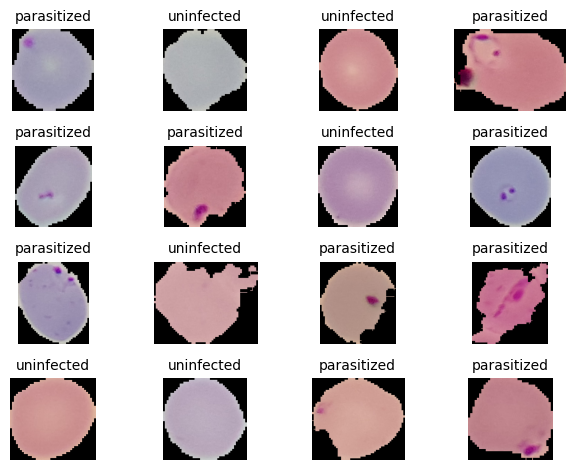

In [12]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label), fontsize=10)
  plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
# labels of the dataset

label_0 = dataset_info.features['label'].int2str(0)
label_1 = dataset_info.features['label'].int2str(1)

print("Label 0:", label_0)
print("Label 1:", label_1)

Label 0: parasitized
Label 1: uninfected


## **`5.Data Pre-processing`**

### **`5.0 Augmentation Example`**

In [14]:
def visualize(original, augmented):
  plt.subplot(1,2,1)
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.imshow(augmented)

In [15]:
original_image, label = next(iter(train_dataset))

In [16]:
augmented_image = tf.image.rot90(original_image)
augmented_image = tf.image.adjust_saturation(augmented_image, saturation_factor = 0.3)
augmented_image = tf.image.flip_left_right(augmented_image)

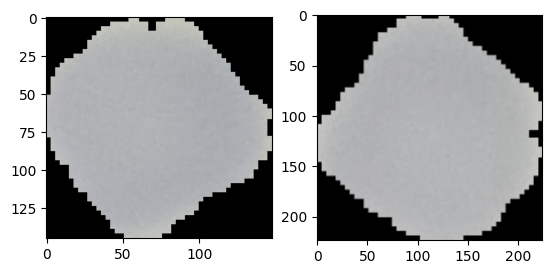

In [17]:
augmented_image = tf.image.resize(augmented_image, (224, 224))/255.0
visualize(original_image, augmented_image)

### **`5.1 Data Augmentation`**

In [18]:
@tf.function # Graph Mode
def resizing_rescale(image, label):
  return tf.image.resize(image, (CONFIGURATION['IM_SIZE'], CONFIGURATION['IM_SIZE']))/255.0, label

In [19]:
### Data Augmentation using tf.image

@tf.function # Graph Mode
def augment(image, label):

  # Resizing and rescaling before augmentation
  image, label = resizing_rescale(image,label)

  # Data Augmentation
  image = tf.image.rot90(image)
  image = tf.image.adjust_saturation(image, saturation_factor = 0.3)
  image = tf.image.flip_left_right(image)

  return image, label

In [20]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_SkipDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


### **`5.2 Data Loading`**

In [21]:
# Test resizing_rescaling

test_dataset = test_dataset.map(resizing_rescale)

In [22]:
# Train Data augmentation using tf.image

BATCH_SIZE = 32  # Define the batch size for training

train_dataset = (
                  train_dataset
                  .shuffle(buffer_size=8, reshuffle_each_iteration=True)  # Shuffle the training dataset
                  .map(augment) # augmentation using tf.image
                  .batch(BATCH_SIZE)  # Batch the shuffled dataset
                  .prefetch(tf.data.AUTOTUNE)  # Prefetch batches to improve performance
)


In [23]:
# Validation Data

val_dataset = (
    val_dataset
    .shuffle(buffer_size=8, reshuffle_each_iteration=True)  # Shuffle the validation dataset
    .map(resizing_rescale)
    .batch(BATCH_SIZE)  # Batch the shuffled validation dataset
    .prefetch(tf.data.AUTOTUNE)  # Prefetch batches to improve performance
)

In [24]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


## **`6. Model Creation and Training - Binary Classification`**

### **`6.1 Model Creation using - SEQUENTIAL API`**

In [26]:
# Model Configurations

IM_SIZE = CONFIGURATION['IM_SIZE']
DROPOUT_RATE = CONFIGURATION['DROPOUT_RATE']
REGULARIZATION_RATE = CONFIGURATION['REGULARIZATION_RATE']
N_FILTERS = CONFIGURATION['N_FILTERS']
KERNEL_SIZE = CONFIGURATION['KERNEL_SIZE']
POOL_SIZE = CONFIGURATION['POOL_SIZE']
N_STRIDES = CONFIGURATION['N_STRIDES']

In [27]:
# LeNet Architecture Model

lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

    Conv2D(filters = N_FILTERS , kernel_size = KERNEL_SIZE, strides = N_STRIDES , padding='valid', activation = 'relu',kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),
    MaxPool2D (pool_size = POOL_SIZE, strides= N_STRIDES*2),
    Dropout(rate = DROPOUT_RATE ),

    Conv2D(filters = N_FILTERS*2 + 4, kernel_size = KERNEL_SIZE, strides=N_STRIDES, padding='valid', activation = 'relu', kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),
    MaxPool2D (pool_size = POOL_SIZE, strides= N_STRIDES*2),

    Flatten(),

    Dense( CONFIGURATION['N_DENSE_1'], activation = "relu", kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),
    Dropout(rate = DROPOUT_RATE),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(REGULARIZATION_RATE)),
    BatchNormalization(),

    Dense(1, activation = "sigmoid"),

])

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 6)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      6

### **`6.2 Model Training`**

In [28]:
# Define the list of metrics
metrics = [
    TruePositives(name='tp'),
    FalsePositives(name='fp'),
    TrueNegatives(name='tn'),
    FalseNegatives(name='fn'),
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall'),
    AUC(name='auc')
]

In [29]:
from keras.losses import BinaryCrossentropy

lenet_model.compile(
    optimizer=Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
    loss='binary_crossentropy',
    metrics=metrics
)


In [30]:
history = lenet_model.fit(train_dataset,  validation_data=val_dataset,
                          epochs = CONFIGURATION['N_EPOCHS'], verbose =1,
                          )

Epoch 1/10
689/689 [==============================] - 95s 120ms/step - loss: 0.6495 - tp: 6685.0000 - fp: 3863.0000 - tn: 7156.0000 - fn: 4342.0000 - accuracy: 0.6278 - precision: 0.6338 - recall: 0.6062 - auc: 0.6719 - val_loss: 0.7198 - val_tp: 1231.0000 - val_fp: 1057.0000 - val_tn: 302.0000 - val_fn: 165.0000 - val_accuracy: 0.5564 - val_precision: 0.5380 - val_recall: 0.8818 - val_auc: 0.6135
Epoch 2/10
689/689 [==============================] - 79s 115ms/step - loss: 0.5736 - tp: 7469.0000 - fp: 3147.0000 - tn: 7873.0000 - fn: 3557.0000 - accuracy: 0.6959 - precision: 0.7036 - recall: 0.6774 - auc: 0.7678 - val_loss: 1.5538 - val_tp: 517.0000 - val_fp: 261.0000 - val_tn: 1098.0000 - val_fn: 879.0000 - val_accuracy: 0.5862 - val_precision: 0.6645 - val_recall: 0.3703 - val_auc: 0.6031
Epoch 3/10
689/689 [==============================] - 72s 104ms/step - loss: 0.5155 - tp: 8211.0000 - fp: 2889.0000 - tn: 8134.0000 - fn: 2812.0000 - accuracy: 0.7414 - precision: 0.7397 - recall: 0.

## **`7. Plotting Model Loss and Accuracy`**

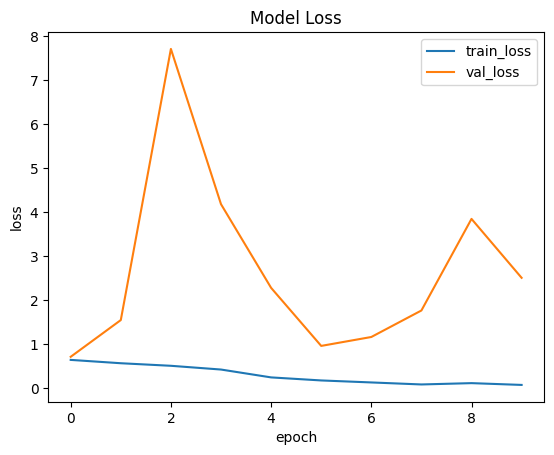

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

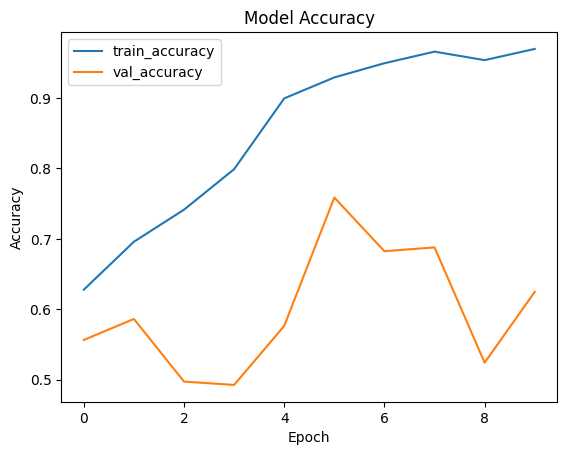

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

## **`8. Model Evaluation, Testing and Prediction`**

### **`8.1. Model Evaluation`**

In [34]:
test_dataset = test_dataset.batch(1)

In [35]:
# Sequential API
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 26s 5ms/step - loss: 2.3434 - tp: 363.0000 - fp: 14.0000 - tn: 1378.0000 - fn: 1002.0000 - accuracy: 0.6315 - precision: 0.9629 - recall: 0.2659 - auc: 0.6595


[2.343364715576172,
 363.0,
 14.0,
 1378.0,
 1002.0,
 0.6314834952354431,
 0.9628646969795227,
 0.2659340798854828,
 0.6594924926757812]

### **`8.2. Model Testing`**

In [36]:
# Parasitized = 0 and UnInfected = 1

def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 16ms/step


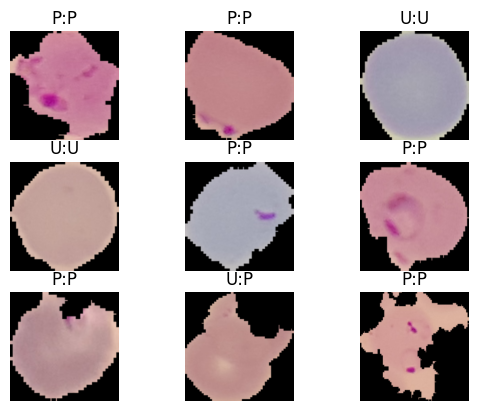

In [37]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy())) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))
  plt.axis('off')

### **`8.3. Model Prediction`**

In [38]:
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 11s 11s/step


0.42790717

In [39]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 11s 11s/step


'P'

## **`9. Visualization Confusion Matrix`**

In [40]:
labels = []
inp = []

for x, y in test_dataset.as_numpy_iterator():
  labels.append([y])
  inp.append(x)

In [41]:
print(np.array(inp).shape)
# Removing 1 from above
print(np.array(inp)[:,0,...].shape)

(2757, 1, 224, 224, 3)
(2757, 224, 224, 3)


In [42]:
print(labels)

[[array([1])], [array([0])], [array([0])], [array([1])], [array([0])], [array([0])], [array([1])], [array([0])], [array([1])], [array([0])], [array([1])], [array([0])], [array([0])], [array([0])], [array([1])], [array([1])], [array([0])], [array([1])], [array([1])], [array([1])], [array([0])], [array([0])], [array([0])], [array([0])], [array([0])], [array([0])], [array([1])], [array([0])], [array([1])], [array([0])], [array([0])], [array([0])], [array([1])], [array([0])], [array([1])], [array([1])], [array([1])], [array([1])], [array([1])], [array([0])], [array([0])], [array([0])], [array([1])], [array([0])], [array([1])], [array([0])], [array([1])], [array([0])], [array([1])], [array([0])], [array([0])], [array([0])], [array([0])], [array([0])], [array([0])], [array([0])], [array([1])], [array([0])], [array([0])], [array([1])], [array([0])], [array([1])], [array([1])], [array([0])], [array([1])], [array([0])], [array([0])], [array([0])], [array([1])], [array([0])], [array([0])], [arra

In [43]:
labels = np.array([i[0] for i in labels])
print(labels)

[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [ ]:
predicted = lenet_model.predict(inp)
print(predicted[:,0])

In [ ]:
inp = np.expand_dims(inp, axis=0)
predicted = lenet_model.predict(inp)
print(predicted[:,0])

In [ ]:
threshold = 0.5

cm = confusion_matrix(labels, predicted>threshold)
print(cm)

In [ ]:
threshold = 0.5

cm = confusion_matrix(labels, predicted > threshold)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix - {}'.format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')


## **`10. ROC Plots`**

In [ ]:
fp, tp, thresholds = roc_curve(labels, predicted)
print(len(fp), len(tp), len(thresholds))

In [ ]:
plt.plot(fp, tp)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

plt.grid()

skip = 20
for i in range (0, len(thresholds), skip):
  plt.text(fp[i], tp[i], thresholds[i])

plt.show()

In [ ]:
# Our Aim is to Reduce False Positives (Parasitised/Infected-0(Negative) ; UnInfected - 1 (Positive))
# The New threshold is pocked up at 0.69
threshold = 0.69

cm = confusion_matrix(labels, predicted>threshold)
print(cm)
plt.figure(figsize=(8,8))

sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - {}'.format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# **`Model Realtime Testing`**

**Note -** Giving Input Image to the Model

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
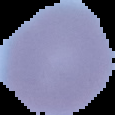

In [142]:
cv2.imread('C1_thinF_IMG_20150604_104722_cell_9.png')

In [152]:
original_image = cv2.imread('C1_thinF_IMG_20150604_104722_cell_9.png')

In [153]:
print(f"Image shape: {original_image.shape}")

Image shape: (115, 115, 3)


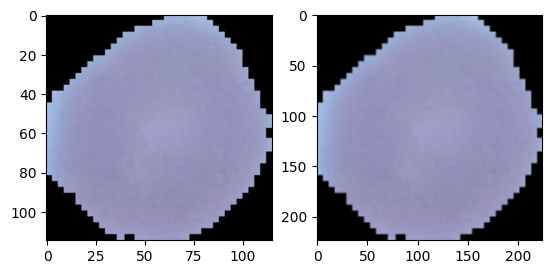

In [154]:
image = tf.image.resize(original_image, (224, 224))/255.0
visualize(original_image, image)

In [156]:
print(f"Image shape: {image.shape}")

Image shape: (224, 224, 3)


In [157]:
image = tf.image.resize(original_image, (224, 224))/255.0
image = tf.expand_dims(image, axis=0)  # Add a new dimension at the beginning
#visualize(original_image, image)
print(f"Image shape: {image.shape}")
lenet_model.predict(image)

Image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step


array([[0.83141416]], dtype=float32)

In [158]:
lenet_model.predict(image)

1/1 [==============================] - 0s 26ms/step


array([[0.83141416]], dtype=float32)

In [159]:
def parasite_or_not(x):
  if(x<0.5):
    return str('Parasitized')
  else:
    return str('UnInfected')

In [160]:
parasite_or_not(lenet_model.predict(image))

1/1 [==============================] - 0s 19ms/step


'U'

# **`Model Saving`**

In [33]:
# Save the model
lenet_model.save('malaria_detection_lenet_model_whole_1')
# Save the model in HDF5 format
lenet_model.save('malaria_detection_lenet_model.hdf5')
# Save the model in H5 format
lenet_model.save('malaria_detection_lenet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
lenet_model.save_weights("malaria_detection_lenet_model_weights")